# Forest Cover Type Prediction

This is a Kaggle competition problem - In this competition we are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

Since we are trying to predict a forest cover type (a TYPE of tree cover) this is a CLASSIFICATION problem.

The data is originally from: Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz

### Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

    1. Rawah Wilderness Area
    2. Neota Wilderness Area
    3. Comanche Peak Wilderness Area
    4. Cache la Poudre Wilderness Area
    
    
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

    1. Cathedral family - Rock outcrop complex, extremely stony.
    2. Vanet - Ratake families complex, very stony.
    3. Haploborolis - Rock outcrop complex, rubbly.
    4. Ratake family - Rock outcrop complex, rubbly.
    5. Vanet family - Rock outcrop complex complex, rubbly.
    6. Vanet - Wetmore families - Rock outcrop complex, stony.
    7. Gothic family.
    8. Supervisor - Limber families complex.
    9. Troutville family, very stony.
    10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
    11. Bullwark - Catamount families - Rock land complex, rubbly.
    12. Legault family - Rock land complex, stony.
    13. Catamount family - Rock land - Bullwark family complex, rubbly.
    14. Pachic Argiborolis - Aquolis complex.
    15. unspecified in the USFS Soil and ELU Survey.
    16. Cryaquolis - Cryoborolis complex.
    17. Gateview family - Cryaquolis complex.
    18. Rogert family, very stony.
    19. Typic Cryaquolis - Borohemists complex.
    20. Typic Cryaquepts - Typic Cryaquolls complex.
    21. Typic Cryaquolls - Leighcan family, till substratum complex.
    22. Leighcan family, till substratum, extremely bouldery.
    23. Leighcan family, till substratum - Typic Cryaquolls complex.
    24. Leighcan family, extremely stony.
    25. Leighcan family, warm, extremely stony.
    26. Granile - Catamount families complex, very stony.
    27. Leighcan family, warm - Rock outcrop complex, extremely stony.
    28. Leighcan family - Rock outcrop complex, extremely stony.
    29. Como - Legault families complex, extremely stony.
    30. Como family - Rock land - Legault family complex, extremely stony.
    31. Leighcan - Catamount families complex, extremely stony.
    32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
    33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
    34. Cryorthents - Rock land complex, extremely stony.
    35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
    36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
    37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
    38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
    39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
    40. Moran family - Cryorthents - Rock land complex, extremely stony.



In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\forest-cover-analysis.ipynb
.\test.csv
.\train.csv
.\.idea\.gitignore
.\.idea\misc.xml
.\.idea\modules.xml
.\.idea\MSCS-MachineLearning.iml
.\.idea\workspace.xml
.\.idea\inspectionProfiles\profiles_settings.xml


In [11]:
df = pd.read_csv("train.csv", index_col="Id")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wildernes

In [13]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [14]:
print(df.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [15]:
df_numeric = df.drop(columns=[
       'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3','Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

<Axes: >

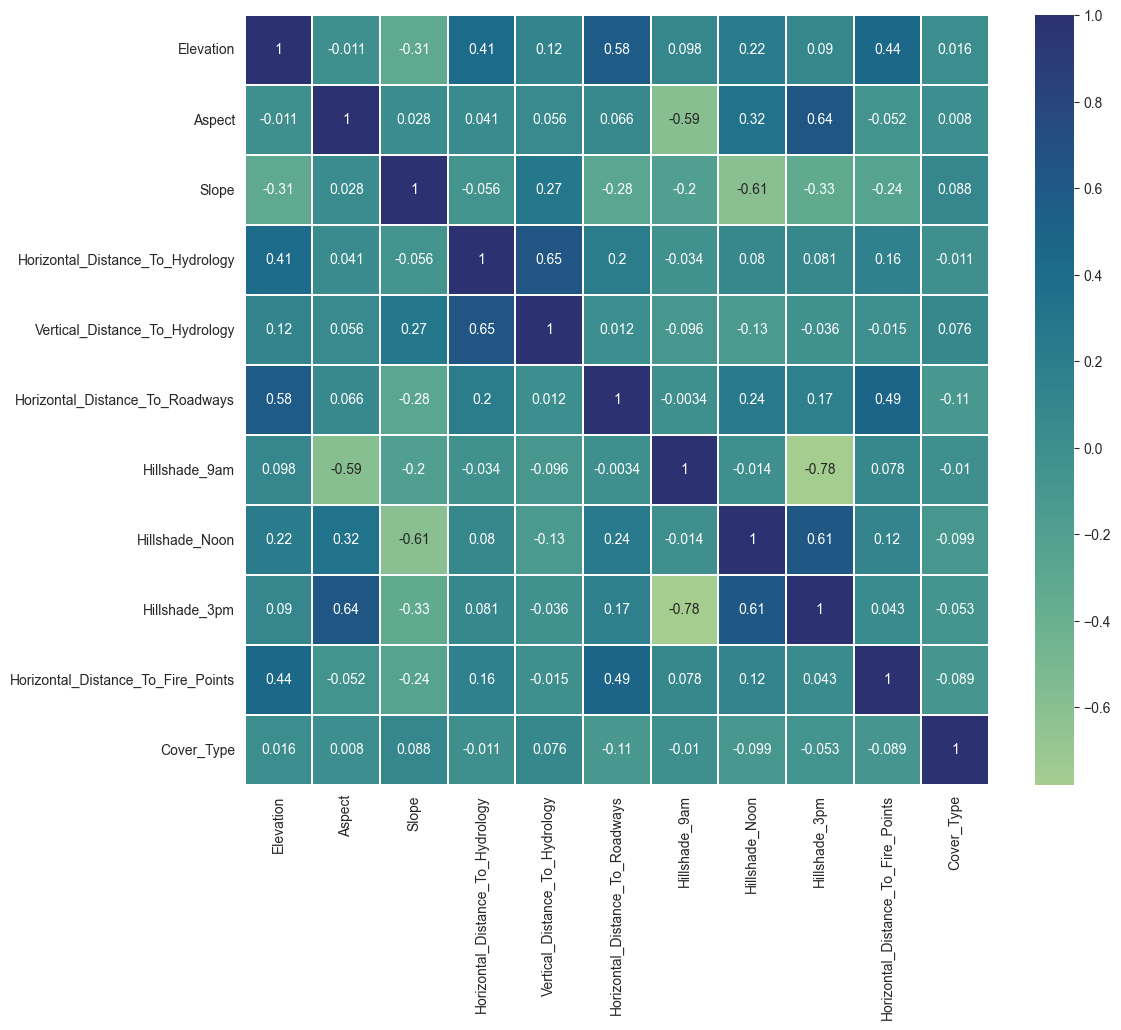

In [16]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=.3, cmap="crest")

### Correlation Analysis

There are no numerical variables with very concerningly high co-variance. The highest is 0.65 between Vertical Distance to Hydrology and Horizontal Distance to Hydrology. Some other medium correlation pairs exist, and tend to make geographic sense - for example "aspect ratio" (eg slope) and hillshade at 3pm. Based on the correlations, I don't see any reason to remove variables.

# K Nearest Neighbors Classification

To begin, I will try using the KNN algorithm to predict the forest cover. One likely problem with this approach is that it will be difficult to use the large number of one-hot encoded "Soil Type" fields in the analysis. Including so many fields in a KNN model would rapidly increase the dimensionality and dramaticly increase the sparseness. As such, for now, I will begin with a KNN using only the numeric fields. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df_numeric.drop('Cover_Type', axis=1)
y = labels = df['Cover_Type']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
train_acc = accuracy_score(test_y, y_pred)
print(f'Training Accuracy: {train_acc}')
confusion_matrix(test_y, y_pred)

Training Accuracy: 0.8048941798941799


array([[264,  79,   1,   0,  26,   0,  51],
       [103, 227,  20,   0,  65,  18,   5],
       [  0,   2, 324,  37,   5,  60,   0],
       [  0,   0,   1, 439,   0,   9,   0],
       [  1,   4,   9,   0, 401,   1,   0],
       [  0,   5,  38,  27,   7, 355,   0],
       [ 13,   3,   0,   0,   0,   0, 424]], dtype=int64)

### Lets try changing the number of neighbors for KNN
We will record and plot the accuracy for KNN with K (# neighors 1-10)

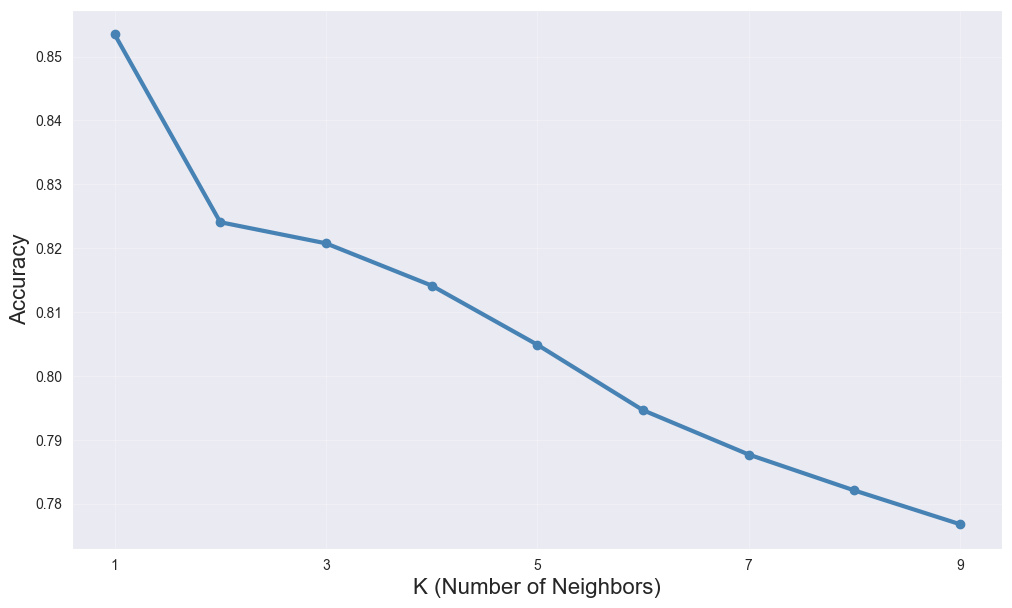

In [18]:
acc = []
k_values = range(1,10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    y_pred = knn.predict(test_X)
    train_acc = accuracy_score(test_y, y_pred)
    acc.append(train_acc)


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(k_values, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("K (Number of Neighbors)", fontsize=16)
ax.set_ylabel("Accuracy", fontsize=16)
plt.xticks(range(1,10,2))
ax.grid(alpha=0.25)


### KNN Analysis

It seems that looking at a single neighbor gave the highest accuracy, over 85%, and then there is a moderate decline with each new neighbor. 

# Random Forests
First, I will try a Random Forest using the numeric feature columns only (without the soil type). Then we will see if there is any effect to adding in the soil type.

In [19]:
from sklearn.ensemble import RandomForestClassifier

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rfc.fit(train_X, train_y)

y_pred = rfc.predict(test_X)
train_acc = accuracy_score(test_y, y_pred)
print(f'Training Accuracy: {train_acc}')
confusion_matrix(test_y, y_pred)

Training Accuracy: 0.8442460317460317


array([[313,  54,   0,   0,  10,   0,  44],
       [ 88, 277,  16,   0,  40,  14,   3],
       [  0,   4, 345,  20,   2,  57,   0],
       [  0,   0,   7, 439,   0,   3,   0],
       [  1,   4,   8,   0, 400,   3,   0],
       [  0,   7,  43,  21,   6, 355,   0],
       [ 16,   0,   0,   0,   0,   0, 424]], dtype=int64)

### Now using all feature columns

In [20]:
X = df.drop('Cover_Type', axis=1) # Using full df
y = labels = df['Cover_Type']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

# Tried different criterions, and log_loss performed the best
rfc2 = RandomForestClassifier(n_estimators = 100, criterion='log_loss', min_samples_leaf=1, min_samples_split=2, n_jobs = -1)
rfc2.fit(train_X, train_y)

y_pred = rfc2.predict(test_X)
train_acc = accuracy_score(test_y, y_pred)
print(f'Training Accuracy: {train_acc}')
confusion_matrix(test_y, y_pred)

Training Accuracy: 0.8697089947089947


array([[329,  57,   0,   0,  15,   0,  20],
       [ 73, 309,  14,   0,  33,   8,   1],
       [  0,   0, 354,  21,   2,  51,   0],
       [  0,   0,   5, 439,   0,   5,   0],
       [  0,   5,   9,   0, 400,   2,   0],
       [  0,   3,  41,  15,   2, 371,   0],
       [ 12,   0,   0,   0,   0,   0, 428]], dtype=int64)

### Random Forest Analysis
Adding in the soil type feature data, gave a very small boost to accuracy. Furthermore, I tried playing with several of the hyperparameters for the RandomForestClassifier such as the criterion, the min_samples_leaf, and the min_samples_split. The log_loss criterion gave slightly better accuracy, but I found changing either of the other hyperparameters off their default value did NOT improve accuracy.

## Kaggle Submission

Output the model predictions for submission

In [22]:
df_test = pd.read_csv("test.csv")
X_test = df_test.drop('Id', axis=1)
test_ids = df_test['Id']
 
with open("submission.csv", "w") as outfile:
    outfile.write("Id,Cover_Type\n")
    for e, val in enumerate(list(rfc2.predict(X_test))):
        outfile.write("%s,%s\n"%(test_ids[e],val))

# Discussion

### Learning + Takeaways

This was a very quick analysis of an interesting data set. One big takeaway for me is how nice it is to start with a "clean" set of data. In this case, all of the rows in the provided data were complete, there were no nulls, and all columns had the correct data type. Upon doing the models, one of the things I found interesting was the overall similarity in accuracy between the KNN model and the Random Forest model. 

### Things That Didn't Quite Work

I tired adjusting a few of the different hyperparameters on each model, but in nearly all cases the default values from SKlearn proved to give better performance in this case. 

### Ways to Improve

The analysis and models could potentially be improved by additional "feature engineering", or by choosing different models/algorithms. I attempted to emulate the material provided in the course, but I'm sure there are more options available. Perhaps even other classification models such as AdaBoost or AgBoost may prove useful. 